In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
import torch
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
from torchmetrics.functional import structural_similarity_index_measure, peak_signal_noise_ratio

In [2]:
output = np.load('Data/0227/output_1000epoch_mse_tv_1e-2_num50_range0.01_0.npy')
# 10: 'Data/0227/output_1000epoch_mse_tv_1e-1.npy'
# 50: 'Data/0227/output_1000epoch_mse_tv_1e-2_num50_range0.01_0.npy'
gt = np.load('Data/ground_truth_na_list_3D_rand_10.npy')

In [3]:
psnr = peak_signal_noise_ratio(torch.from_numpy(output), torch.from_numpy(gt))
ssim = structural_similarity_index_measure(torch.from_numpy(output[np.newaxis,:,:,:]), torch.from_numpy(gt[np.newaxis,:,:,:]))
print(psnr)
print(ssim)

tensor(27.3347)
tensor(0.7221)


interactive(children=(IntSlider(value=0, description='i', max=24), Output()), _dom_classes=('widget-interact',…

<function __main__.updateFrames(i)>

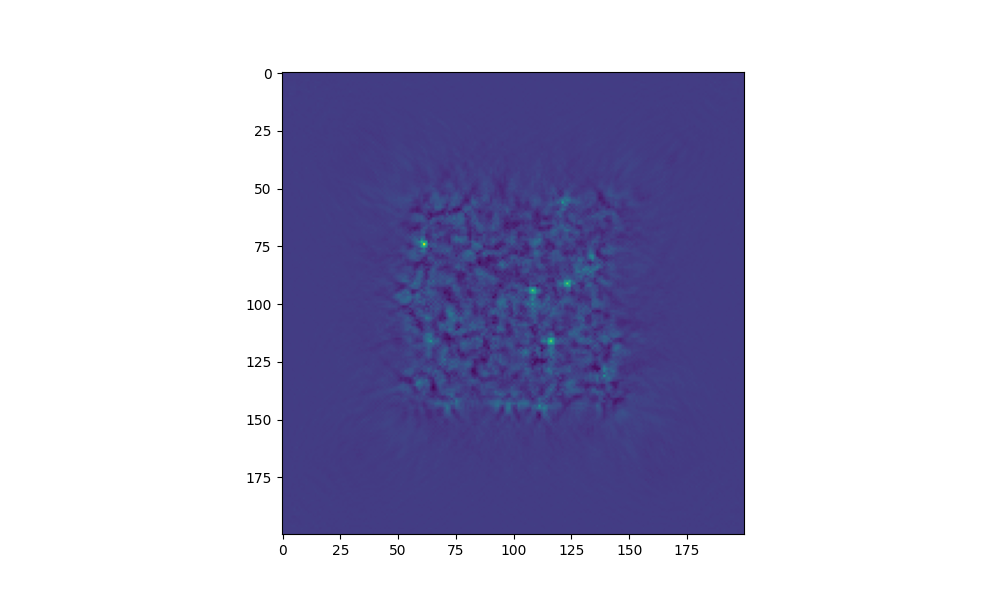

In [4]:
# Show forward
f, axes = plt.subplots(1, 1, figsize=(10, 6))
frames = []

def init():
    frames.append(axes.imshow(output[:,:,0]))

init()

def updateFrames(i):
    frames[0].set_data(output[:, :, i])


interact(updateFrames, i=IntSlider(min=0, max=24, step=1, value=0))